In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_left_wk0 = pd.read_csv('PT17 LEFT_595_imu_week0.csv')
df_right_wk0 = pd.read_csv('PT17 RIGHT_550_imu_week0.csv')

In [3]:
df_left_wk0.head()

,timestamp,x,y,z,gx,gy,gz
0,536140610,9.641027,-1.165346,0.564726,-5.39,-2.10,-0.28
1,536140630,9.746315,-1.206026,0.713087,-4.27,-1.19,0.00
2,536140650,9.533346,-1.452495,0.636514,-4.27,-1.05,-0.07
3,536140670,9.487881,-1.287384,0.595834,-4.34,-0.84,0.07
4,536140689,9.703242,-1.351993,0.703515,-3.85,-0.14,-0.35


In [4]:
df_right_wk0.shape

(10800, 7)

In [5]:
df_left_wk0.shape

(10336, 7)

In [6]:
df_left_wk0.columns

Index(['timestamp', 'x', 'y', 'z', 'gx', 'gy', 'gz'], dtype='object')

Finding Missing Value

In [7]:
df_left_wk0.isnull().sum()

timestamp    0
x            0
y            0
z            0
gx           0
gy           0
gz           0
dtype: int64

Descriptive Statistics

In [ ]:
df_left_wk0.describe()


,timestamp,x,y,z,gx,gy,gz
count,1.033600e+04,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000,10336.000000
mean,5.362433e+08,10.372641,0.617831,2.349952,3.787890,-1.658768,-0.173720
std,5.929205e+04,8.716476,13.206337,8.010557,66.401088,53.788230,113.407385
min,5.361406e+08,-64.720985,-78.401240,-78.360560,-623.490000,-518.140000,-434.350000
25%,5.361919e+08,6.661258,-1.993292,0.588655,-2.800000,-5.390000,-1.890000
50%,5.362433e+08,9.449594,-0.701122,1.658285,-0.280000,-2.660000,-0.560000
75%,5.362946e+08,9.765458,4.278520,5.858437,3.990000,-0.490000,3.150000
max,5.363460e+08,78.336630,78.367740,78.401240,1038.310000,878.990000,911.330000


<Axes: ylabel='Density'>

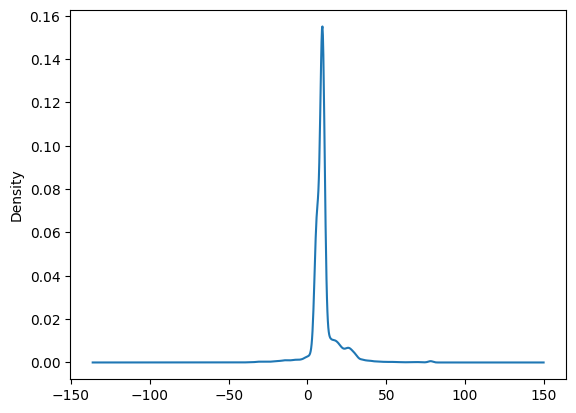

In [9]:
df_left_wk0['x'].plot(kind='kde')

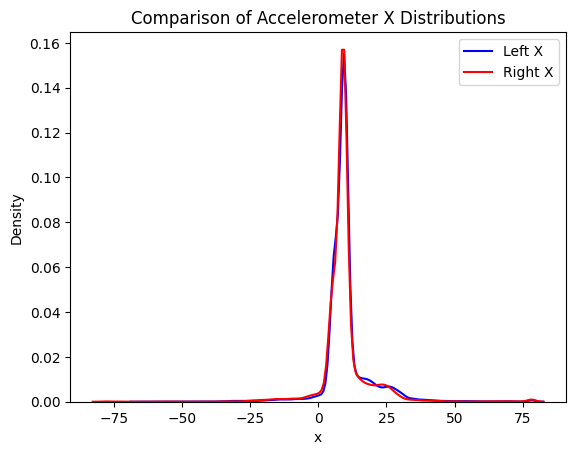

In [10]:
# Example: Comparing accelerometer X data distributions
sns.kdeplot(df_left_wk0['x'], label='Left X', color='blue')
sns.kdeplot(df_right_wk0['x'], label='Right X', color='red')
plt.title('Comparison of Accelerometer X Distributions')
plt.legend()
plt.show()


In [11]:
df_left_wk0['x'].skew() # This is a bit skewed

np.float64(1.802059926031149)

<Axes: ylabel='Density'>

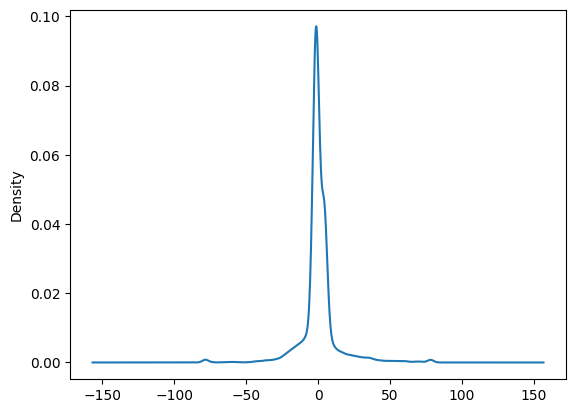

In [12]:
df_left_wk0['y'].plot(kind='kde')

In [13]:
df_left_wk0['y'].skew()

np.float64(0.609976205565247)

<Axes: ylabel='Density'>

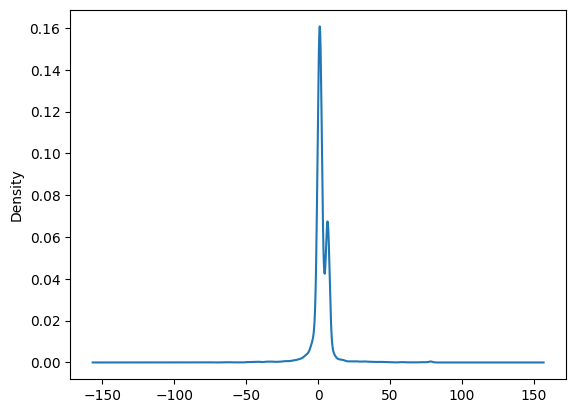

In [14]:
df_left_wk0['z'].plot(kind='kde')

In [15]:
df_left_wk0['z'].skew()

np.float64(0.9291975405695945)

<Axes: ylabel='Density'>

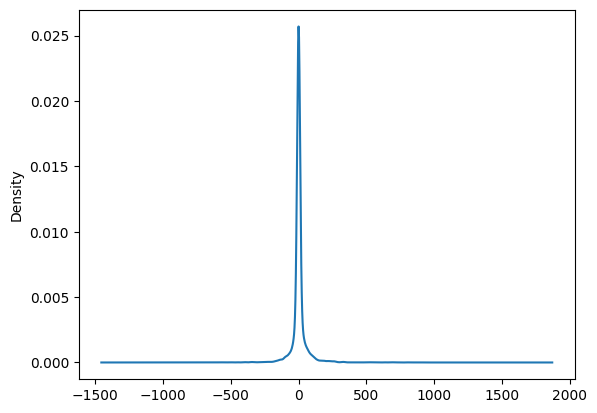

In [16]:
df_left_wk0['gx'].plot(kind='kde')

<Axes: >

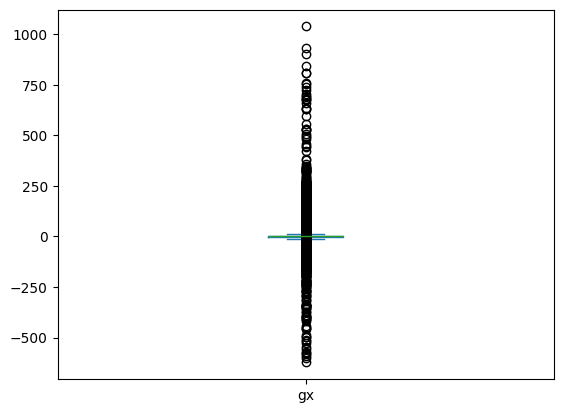

In [17]:
df_left_wk0['gx'].plot(kind='box')

<Axes: ylabel='Density'>

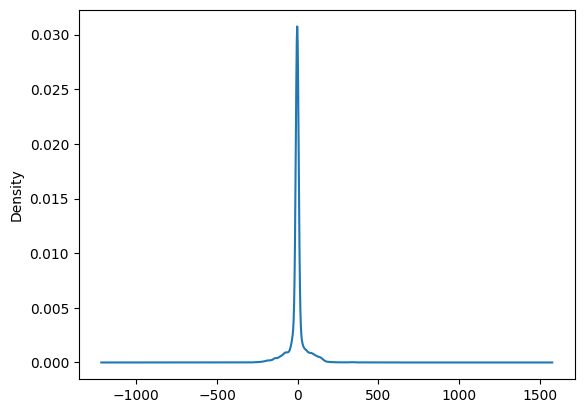

In [18]:
df_left_wk0['gy'].plot(kind='kde')

<Axes: >

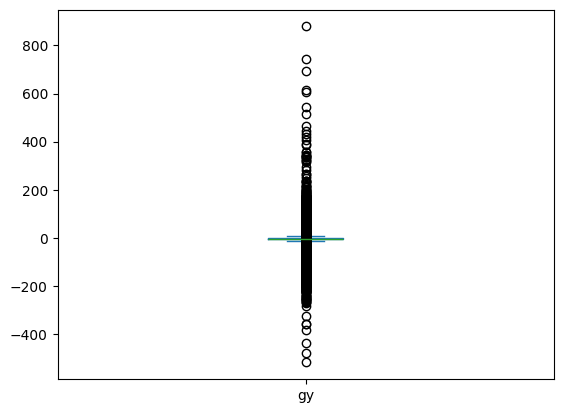

In [19]:
df_left_wk0['gy'].plot(kind='box')

<Axes: ylabel='Density'>

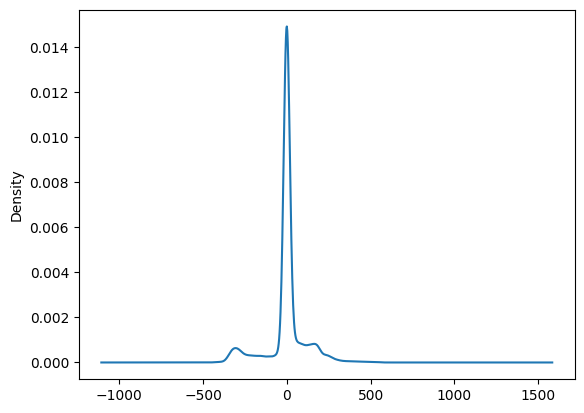

In [20]:
df_left_wk0['gz'].plot(kind='kde')

In [21]:
df_left_wk0['gz'].skew()

np.float64(-0.30206587415108443)

<Axes: >

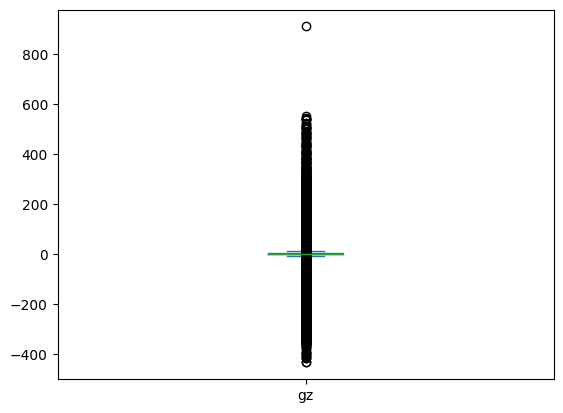

In [22]:

df_left_wk0['gz'].plot(kind='box')

In [23]:
df_left_wk0[df_left_wk0['gz']>600]

,timestamp,x,y,z,gx,gy,gz
395,536148459,78.32945,-29.047512,-0.842304,441.21,-94.08,911.33


*So this dataset has outliers, a bit of skewness and no missing value

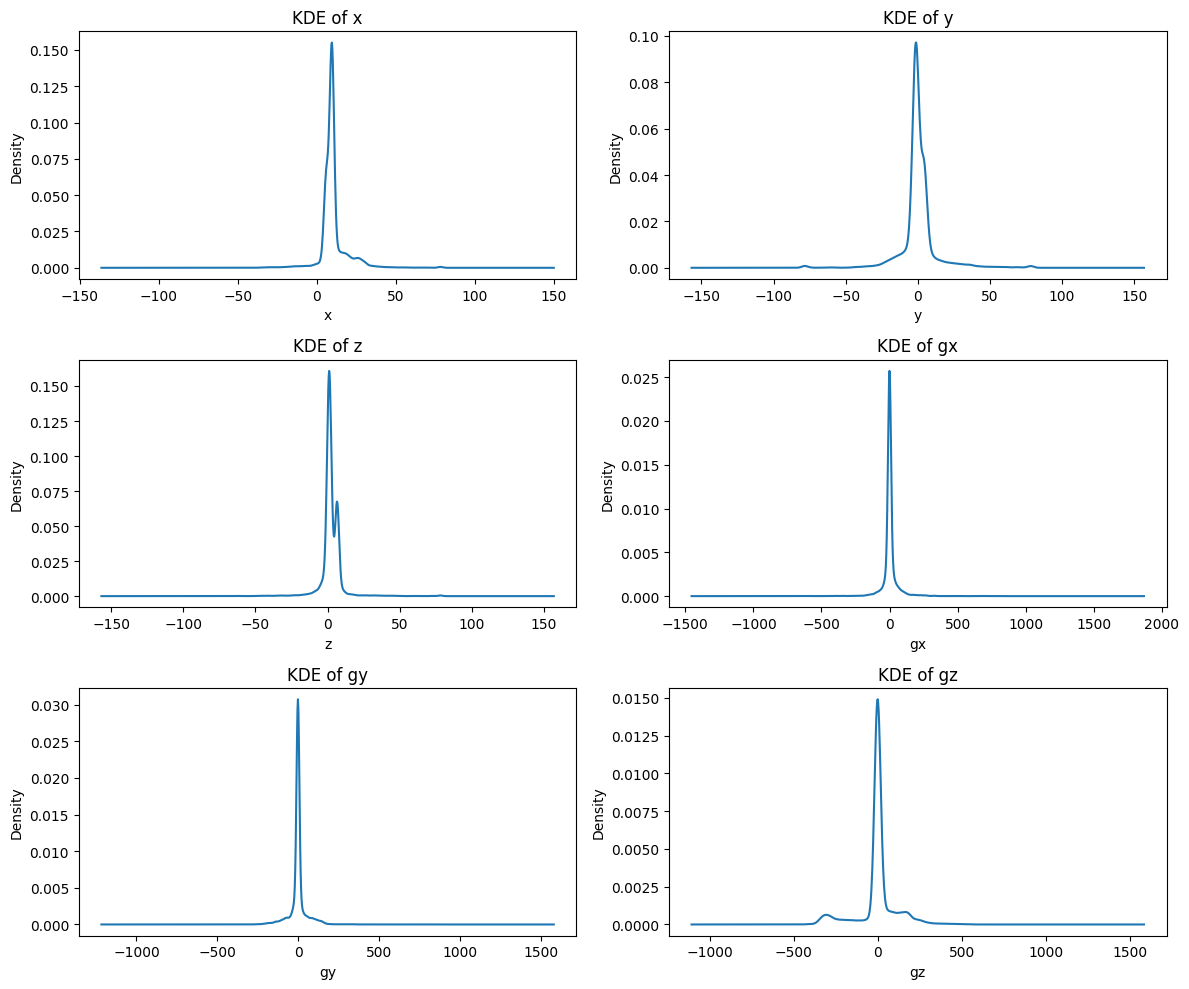

In [34]:
# List of features to plot
features = ['x', 'y', 'z', 'gx', 'gy', 'gz']

# Set up the figure size
plt.figure(figsize=(12, 10))

# Loop through each feature and plot the KDE
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  # Adjust the subplot layout as necessary
    df_left_wk0[feature].plot(kind='kde', title=f'KDE of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

Bivariate Analysis


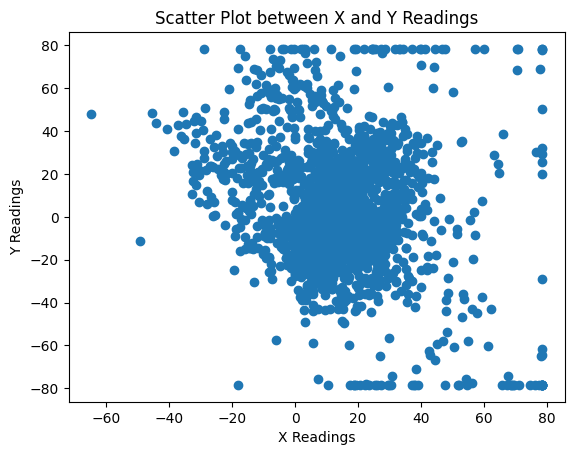

In [24]:
#Between x and y
plt.scatter(df_left_wk0['x'], df_left_wk0['y'])
plt.title('Scatter Plot between X and Y Readings')
plt.xlabel('X Readings')
plt.ylabel('Y Readings')
plt.show()


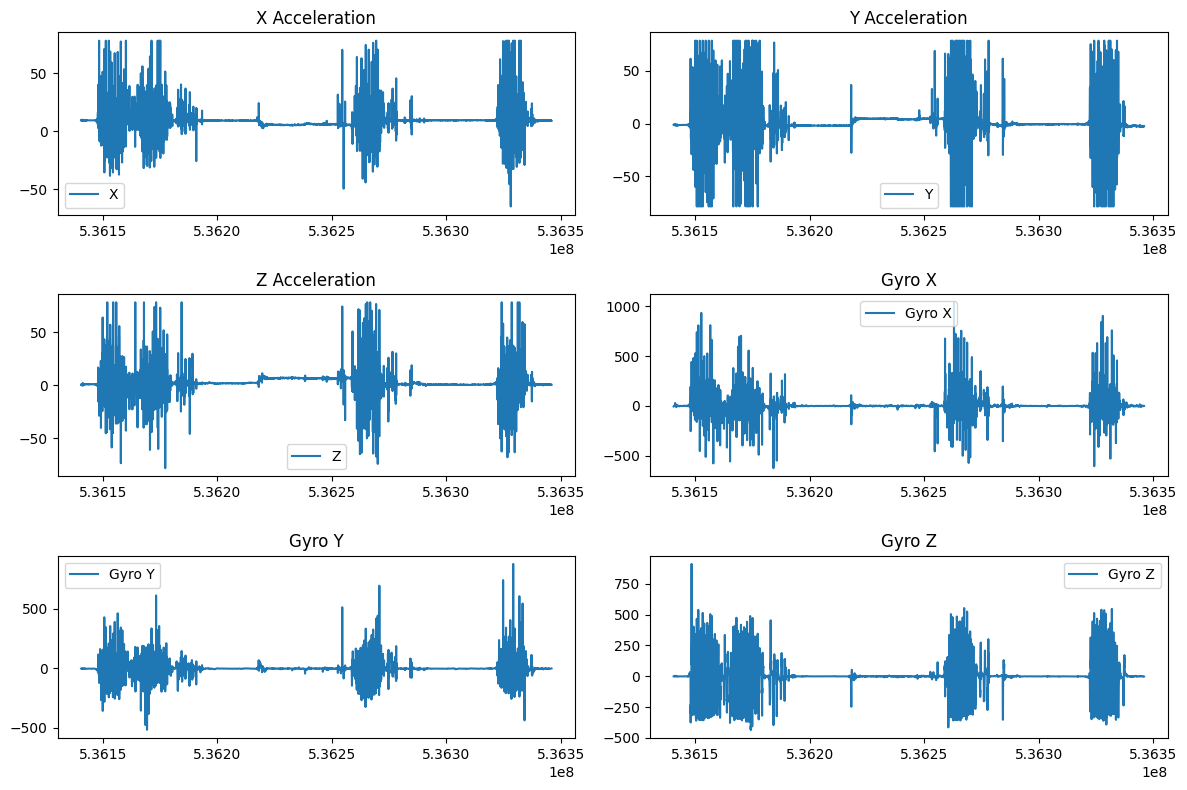

In [25]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 2, 1)
plt.plot(df_left_wk0['timestamp'], df_left_wk0['x'], label='X')
plt.title('X Acceleration')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(df_left_wk0['timestamp'], df_left_wk0['y'], label='Y')
plt.title('Y Acceleration')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(df_left_wk0['timestamp'], df_left_wk0['z'], label='Z')
plt.title('Z Acceleration')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(df_left_wk0['timestamp'], df_left_wk0['gx'], label='Gyro X')
plt.title('Gyro X')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(df_left_wk0['timestamp'], df_left_wk0['gy'], label='Gyro Y')
plt.title('Gyro Y')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(df_left_wk0['timestamp'], df_left_wk0['gz'], label='Gyro Z')
plt.title('Gyro Z')
plt.legend()

plt.tight_layout()
plt.show()

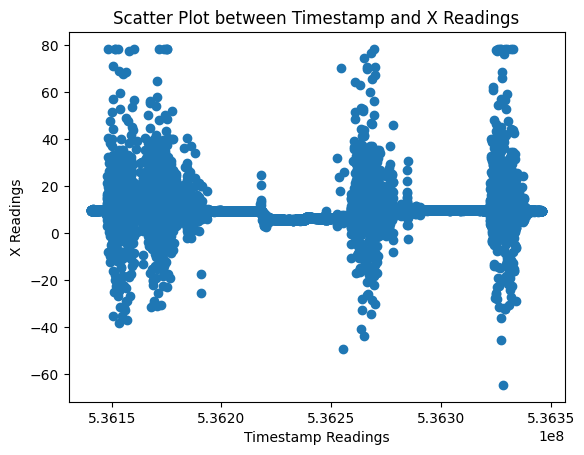

In [26]:
#Between timestamps and x
plt.scatter(df_left_wk0['timestamp'], df_left_wk0['x'])
plt.title('Scatter Plot between Timestamp and X Readings')
plt.xlabel('Timestamp Readings')
plt.ylabel('X Readings')
plt.show()

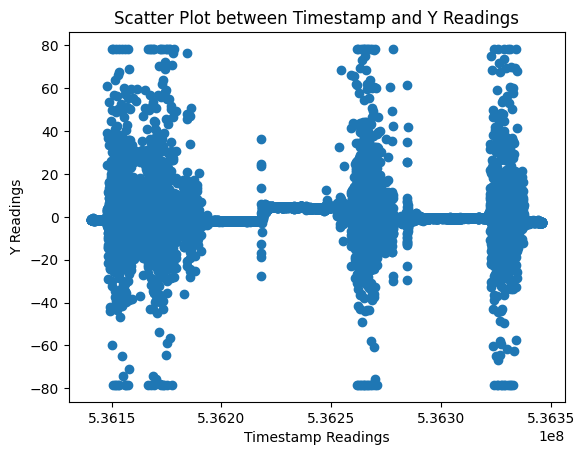

In [27]:
#Between timestamps and y
plt.scatter(df_left_wk0['timestamp'], df_left_wk0['y'])
plt.title('Scatter Plot between Timestamp and Y Readings')
plt.xlabel('Timestamp Readings')
plt.ylabel('Y Readings')
plt.show()

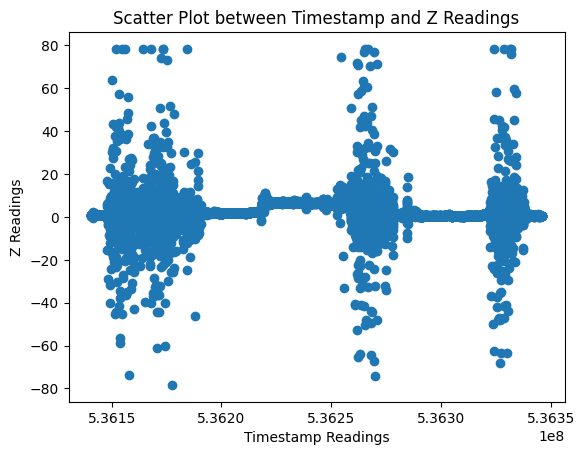

In [28]:
#Between timestamps and z
plt.scatter(df_left_wk0['timestamp'], df_left_wk0['z'])
plt.title('Scatter Plot between Timestamp and Z Readings')
plt.xlabel('Timestamp Readings')
plt.ylabel('Z Readings')
plt.show()

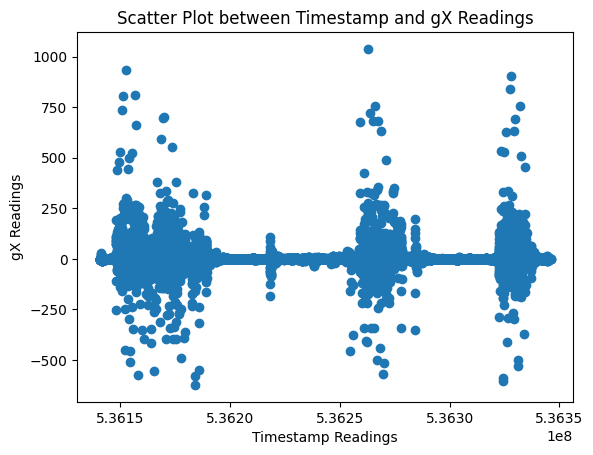

In [29]:
#Between timestamps and gx
plt.scatter(df_left_wk0['timestamp'], df_left_wk0['gx'])
plt.title('Scatter Plot between Timestamp and gX Readings')
plt.xlabel('Timestamp Readings')
plt.ylabel('gX Readings')
plt.show()

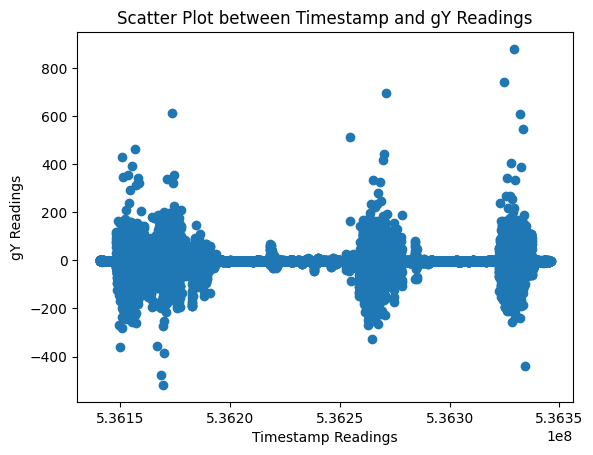

In [30]:
#Between timestamps and gy
plt.scatter(df_left_wk0['timestamp'], df_left_wk0['gy'])
plt.title('Scatter Plot between Timestamp and gY Readings')
plt.xlabel('Timestamp Readings')
plt.ylabel('gY Readings')
plt.show()

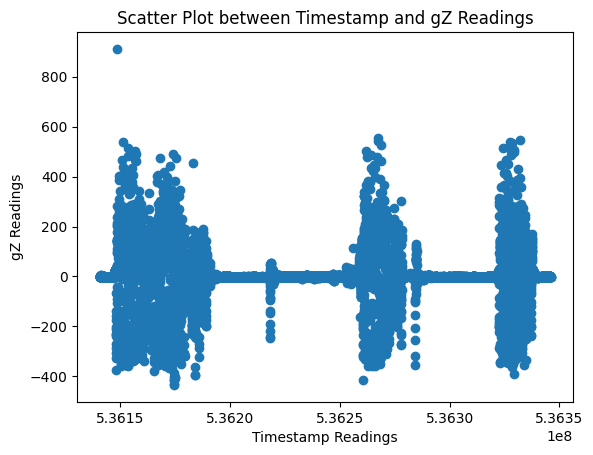

In [31]:
#Between timestamps and gz
plt.scatter(df_left_wk0['timestamp'], df_left_wk0['gz'])
plt.title('Scatter Plot between Timestamp and gZ Readings')
plt.xlabel('Timestamp Readings')
plt.ylabel('gZ Readings')
plt.show()

1. Periodicity is noticed
2. Outliers are clearly visible
3. No linear regression, maybe polynomial regression can be possible.

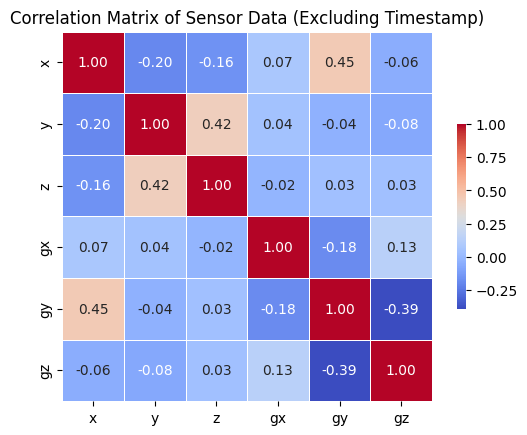

In [32]:

# Selecting only sensor data columns if they are named as 'x', 'y', 'z', 'gx', 'gy', 'gz'
sensor_data_columns = ['x', 'y', 'z', 'gx', 'gy', 'gz']
correlation_matrix = df_left_wk0[sensor_data_columns].corr()

# Set up the matplotlib figure
#plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Sensor Data (Excluding Timestamp)')
plt.show()
